In [33]:
import pandas as pd
import numpy as np
from math import inf
import matplotlib.pyplot as plt
import seaborn as sns


# Representation of data exploration

### With the user.csv file

In [34]:
# Importation CSV file
df = pd.read_csv('data/users.csv')


### Some stats

Total number of users :

In [35]:
# Number of users (each row = one user)
nb_utilisateurs = df['user_id'].nunique()
print(f"Nombre d'utilisateurs : {nb_utilisateurs}")


Nombre d'utilisateurs : 1843439


Total number of tweet : 

In [36]:
# Nombre total de tweets
nb_tweets_total = df['n_tweets'].sum()
print(f"Nombre total de tweets : {nb_tweets_total}")


Nombre total de tweets : 4569999


Max tweets send by a single user :

In [37]:
print("Max number of tweet send by a single user : ", df['n_tweets'].max())

Max number of tweet send by a single user :  7143


In [38]:
# Average number of tweets per user

moyenne_tweets = df['n_tweets'].mean()
print(f"Average number of tweets per user : {moyenne_tweets:.2f}")

Average number of tweets per user : 2.48


## Visualisation

**Histogram (log-scale) for the distribution of tweets**

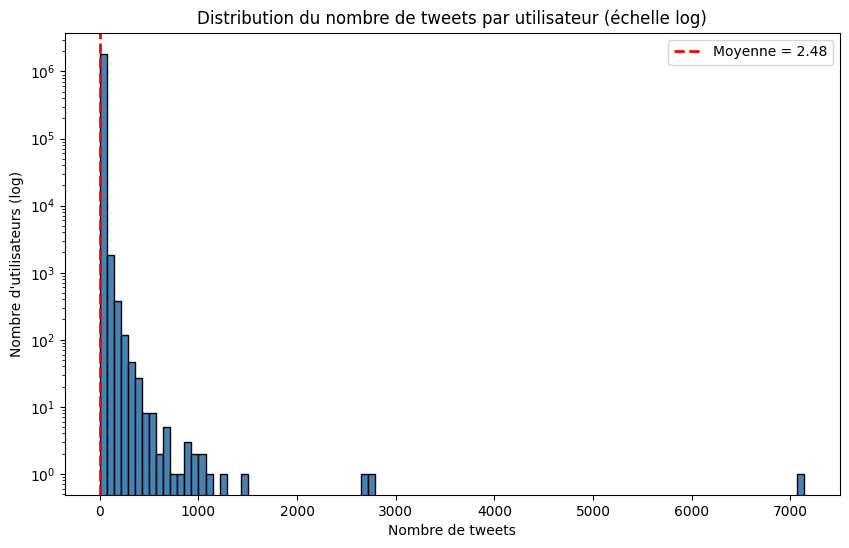

In [39]:
plt.figure(figsize=(10, 6))
plt.hist(df['n_tweets'], bins=100, color='steelblue', edgecolor='black', log=True)
plt.title('Distribution du nombre de tweets par utilisateur (échelle log)')
plt.xlabel('Nombre de tweets')
plt.ylabel('Nombre d\'utilisateurs (log)')
plt.axvline(moyenne_tweets, color='red', linestyle='dashed', linewidth=2, label=f'Moyenne = {moyenne_tweets:.2f}')
plt.legend()
plt.show()


Via une échelle logarithme, on peut remarquer que, à part certaines exceptions (surement des comptes utilisés pour le spam), la plupart des gens postent seulement quelques tweets dans notre base de donnée. Regardons tout cela de plus près.

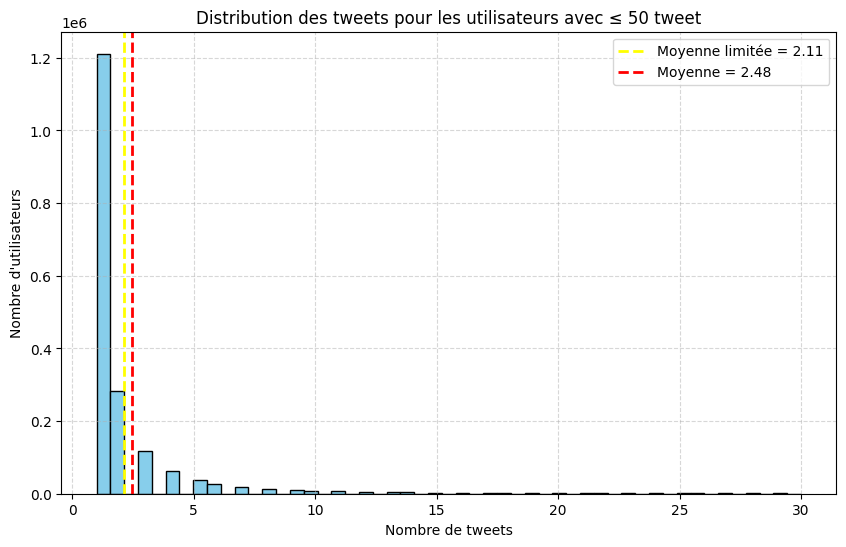

In [40]:
# Filtrer les utilisateurs ayant 30 tweets ou moins
df_limité = df[df['n_tweets'] <= 30]

# Tracer l'histogramme à nouveau
plt.figure(figsize=(10, 6))
plt.hist(df_limité['n_tweets'], bins=51, color='skyblue', edgecolor='black')
plt.title('Distribution des tweets pour les utilisateurs avec ≤ 50 tweet')
plt.xlabel('Nombre de tweets')
plt.ylabel('Nombre d\'utilisateurs')
plt.grid(True, linestyle='--', alpha=0.5)
moyenne_limitee = df_limité['n_tweets'].mean()
plt.axvline(moyenne_limitee, color='yellow', linestyle='dashed', linewidth=2, label=f'Moyenne limitée = {moyenne_limitee:.2f}')
plt.axvline(moyenne_tweets, color='red', linestyle='dashed', linewidth=2, label=f'Moyenne = {moyenne_tweets:.2f}')
plt.legend()
plt.show()


# Average interaction types per user

Without 'max_followers', 'f_tweets', 'time_active'

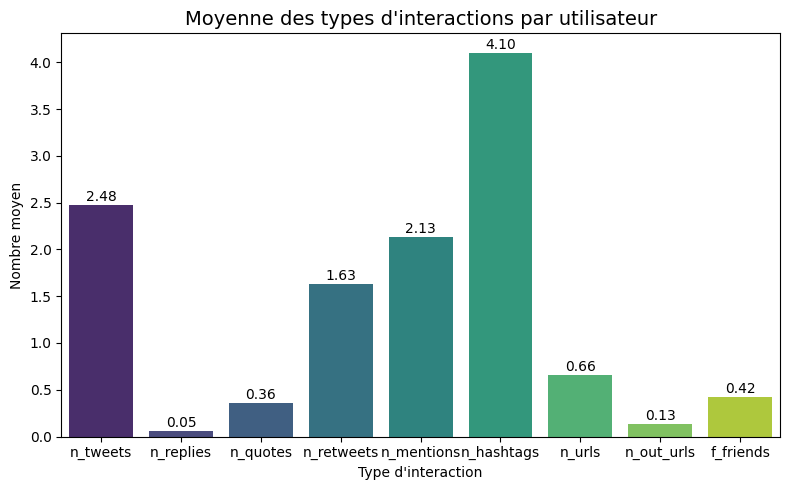

In [41]:
# Important columns
moyennes = df[['n_tweets', 'n_replies', 'n_quotes', 'n_retweets', 
                    'n_mentions', 'n_hashtags', 
                    'n_urls', 'n_out_urls', 'f_friends']].mean()

# Using DataFrame to use "hue"
df_moyennes = moyennes.reset_index()
df_moyennes.columns = ['Interaction', 'Valeur']

plt.figure(figsize=(8, 5))
ax = sns.barplot(data=df_moyennes, x='Interaction', y='Valeur', hue='Interaction', palette='viridis', legend=False)

# Title and label
plt.title('Moyenne des types d\'interactions par utilisateur', fontsize=14)
plt.ylabel('Nombre moyen')
plt.xlabel('Type d\'interaction')

# With the value
for i, val in enumerate(df_moyennes['Valeur']):
    ax.text(i, val + 0.01, f'{val:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


**Correlation matrix of Twitter variables**

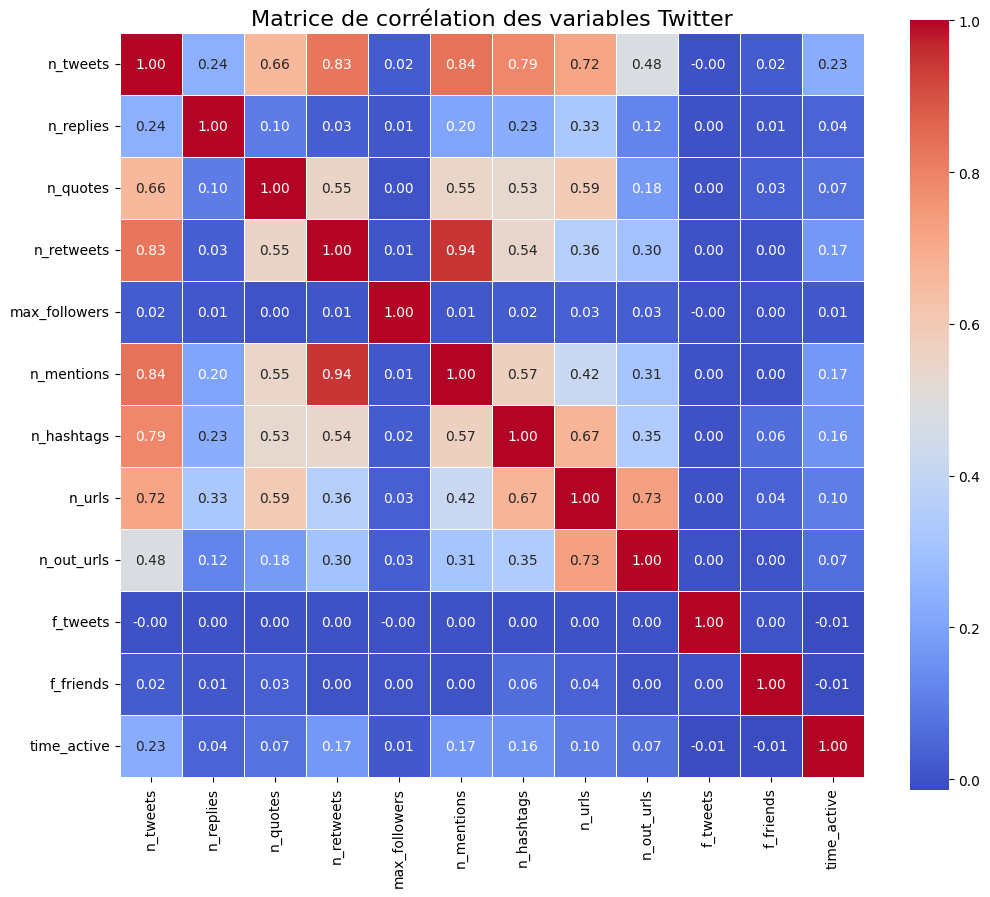

In [42]:
# Columns to analyse (all)
correlation_vars = ['n_tweets', 'n_replies', 'n_quotes', 'n_retweets', 
                    'max_followers', 'n_mentions', 'n_hashtags', 
                    'n_urls', 'n_out_urls', 'f_tweets', 'f_friends', 'time_active']

# Correlation matrix
corr = df[correlation_vars].corr()

# Plot de la heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Matrice de corrélation des variables Twitter', fontsize=16)
plt.show()